In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [3]:
# Step1 - 이미지 불러오기
I = cv2.imread('hero1.jpeg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('image', I)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# Step2 - Laplacian filter 만들기
def my_laplacian_filter(image):
    
    kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])                                       # np.array 이용해서 Laplacian filter kernel 생성
    border = cv2.filter2D(image,-1,kernel)                                             # cv2.filter2D 이용해서 kernel과 blurred 이미지 convolution
        
    return border

In [5]:
# Step3 - 원본 영상에 OpenCV에서 제공하는 Gaussian Filter를 적용해 노이즈를 제거하세요
gaussian_filter_I = cv2.GaussianBlur(I, (3,3), 10)                                    # cv2.GaussianBlur 함수 이용해서 이미지 blur 처리 (Noise 제거)

# Step4. Step3의 결과물에 자신이 만든 Laplacian filter를 적용해 이미지의 경계를 검출하세요.
laplacian_my = my_laplacian_filter(gaussian_filter_I)

# Step5 - 원본 영상에 OpenCV에서 제공하는 Gaussian Filter를 적용해 노이즈를 제거하세요
laplacian_opencv = cv2.Laplacian(laplacian_my, -1, 3)                 # cv2.Laplacian 함수 이용해서 위에서 blur처리한 이미지의 laplacian filter 적용, ksize = 3 적용

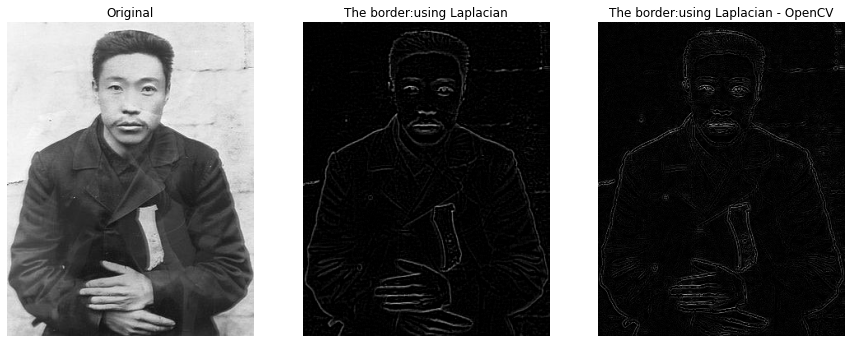

In [7]:
fig = plt.figure(figsize = (15, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 1
cols = 3


## plotting 하는 부분은 1주차 과제를 참조하여 스스로 채워 넣으세요. 

Intensity_level = [ 256, 32, 16, 8, 4, 2]
step = [ np.rint(255 / (i - 1)) for i in Intensity_level ]

result_1 = np.rint(I / step[0]) *step[0]  
result_1 = result_1.astype('uint8')   
ax1 = fig.add_subplot(rows,cols,1)
result_1_RGB = cv2.cvtColor(result_1, cv2.COLOR_GRAY2RGB)      
ax1.imshow(result_1_RGB)
ax1.set_title('Original')
ax1.axis("off")

result_2 = np.rint(laplacian_my / step[0]) *step[0]  
result_2 = result_2.astype('uint8') 
ax2 = fig.add_subplot(rows,cols,2)
result_2_RGB = cv2.cvtColor(result_2, cv2.COLOR_GRAY2RGB)      
ax2.imshow(result_2_RGB)
ax2.set_title('The border:using Laplacian')
ax2.axis("off")

result_3 = np.rint(laplacian_opencv / step[0]) *step[0]  
result_3 = result_3.astype('uint8') 
ax3 = fig.add_subplot(rows,cols,3)
result_3_RGB = cv2.cvtColor(result_3, cv2.COLOR_GRAY2RGB)      
plt.imshow(result_3_RGB)
ax3.set_title('The border:using Laplacian - OpenCV')
ax3.axis("off")

plt.show()